Для решения гиперболического уравнения

### \begin{equation} 
	\begin{cases}
		\displaystyle \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} + f(x,t) \\
		u(0,t) = \mu_1(t) \\
		u(a,t) = \mu_2(t) \\
		u(x,0) = \phi(x) \\
		u_t(x,0) = \psi(x)
	\end{cases}                                          
\end{equation}

в области $(x,t) \in [0; a] \times [0; T]$ можно использовать «схему с весами» 

### \begin{equation}
	\frac{1}{\tau^2} \left( \hat{u} - 2u + \check{u} \right) = \Lambda \left( \sigma \hat{u} + \left( 1 - 2 \sigma \right) u + \sigma \check{u} \right) + f,
\end{equation}

где $\Lambda$ - оператор пространственного дифференцирования (с учетом умножения на $c^2$).

In [1]:
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from IPython.core.display import display, HTML
from IPython.display import Image
import imageio

import glob

In [19]:
def L(N):
    
    data =  np.diag([-2]*N) + \
            np.diag([1]*(N-1), k=1) + \
            np.diag([1]*(N-1), k=-1)
            
    data[0,0:2] = data[-1, N-2:N] = [0, 0]     
    data[1,0] = data[N-2,N-1] = 0
    
    return data

def scheme_with_weight(x, t, mu1, mu2, phi, psi, c):
    
    a = 1/2

    N = len(x)
    T = len(t)
    h = x[1]-x[0]
    tau = t[1]-x[0]
    
    Lx = (c*tau/h)**2 * L(N)
    Px = np.eye(N) - a * Lx
    
    U = np.zeros((T, N))
    
    U[:,0]  = mu1
    U[:,-1] = mu2
    U[0,:]  = phi
    U[1,:] = phi + tau*psi #+ 1/2*(phi.dot(Lx) + tau**2*f(x,t))
    
    for i in range(1, T-1):
        U[i+1,:] = LA.solve(Px, Lx.dot(U[i,:])) + 2*U[i,:] - U[i-1,:]
    
    return U 


def animate(i):
    
    plt.clf()
    
    plt.xlim(0, X)
    plt.ylim(-1.05, 1.05)
    
    plt.plot(x, U[i], 'b')

    plt.xlabel('x',fontsize = 18)
    plt.ylabel('u(x,t)',fontsize = 18)
    plt.title('t = {:02.2f}'.format(i*tau), fontsize = 18)
    plt.grid()
    
    
def effective_order_of_method(U,r,
                              lable = 'График эффективного порядка',
                              draw_flag = False):
    try:
        
        if len(U) < 3:
            raise IndexError()
            
        N = len(U) - 2
        exp_p = np.zeros(N)
        
        for i in range(N):
            
            U_1 = U[i]
            U_2 = U[i+1]
            U_4 = U[i+2]
            
            ex = norm_c(U_4[0::2,0::2] - U_2)/norm_c(U_2[0::2,0::2] - U_1)
            
            exp_p[i] = -np.log(ex)/np.log(r)
        

        if draw_flag:
            plt.figure(figsize=(18,8))
            plt.plot(range(1,len(exp_p)+1),exp_p,'b*-')    
            plt.grid()
            plt.xlabel('№ triple',fontsize=16)
            plt.ylabel(r'$p$',fontsize=16)
            plt.title(lable,fontsize=15)
            plt.show()
            
        return exp_p
        
    except IndexError:
        print('More than three values are required\n',traceback.format_exc())
        return None

## Задание 1

Решить задачу при $f = 0$, $c = 3$, $\mu_1 = \mu_2 = 0$, $\mu_3(x) = \sin (x)$, $\mu_4 = 0$ в области $[0; 6\pi] \times [0; 10]$. 

Взять $\tau = 0.01$ и $h = 6\pi/100$. Отобразить решение на каждом временном слое.

In [13]:
X = np.pi*6
T = 10

h = 6*np.pi/100
tau = 0.01

N = round(X/h + 1)
Tau = round(T/tau + 1)

x = np.array([h*xx for xx in range(N)])
t = np.array([tau*tt for tt in range(Tau)])

In [14]:
c = 3

f = lambda x,t: np.zeros(len(x))
mu1 = lambda t: np.zeros(len(t))
mu2 = lambda t: np.zeros(len(t))
psi = lambda x: np.zeros(len(x))

In [15]:
%%time
phi = lambda x: np.sin(x)
U = scheme_with_weight(x,t,mu1(t),mu2(t),phi(x),psi(x),c)

Wall time: 203 ms


In [22]:
N = len(x)
Lx = (c*tau/h)**2 * L(N)
print(phi(x).dot(Lx)/2)

[ 0.00000000e+00 -8.40722208e-05 -1.65166141e-04 -2.40408969e-04
 -3.07135189e-04 -3.62980992e-04 -4.05968012e-04 -4.34573413e-04
 -4.47783834e-04 -4.45131290e-04 -4.26709748e-04 -3.93171800e-04
 -3.45705545e-04 -2.85992499e-04 -2.16148026e-04 -1.38646402e-04
 -5.62331592e-05  2.81721709e-05  1.11579488e-04  1.91034046e-04
  2.63721127e-04  3.27065757e-04  3.78823918e-04  4.17162054e-04
  4.40722016e-04  4.48669180e-04  4.40722016e-04  4.17162054e-04
  3.78823918e-04  3.27065757e-04  2.63721127e-04  1.91034046e-04
  1.11579488e-04  2.81721709e-05 -5.62331592e-05 -1.38646402e-04
 -2.16148026e-04 -2.85992499e-04 -3.45705545e-04 -3.93171800e-04
 -4.26709748e-04 -4.45131290e-04 -4.47783834e-04 -4.34573413e-04
 -4.05968012e-04 -3.62980992e-04 -3.07135189e-04 -2.40408969e-04
 -1.65166141e-04 -8.40722208e-05  2.21530719e-17  8.40722208e-05
  1.65166141e-04  2.40408969e-04  3.07135189e-04  3.62980992e-04
  4.05968012e-04  4.34573413e-04  4.47783834e-04  4.45131290e-04
  4.26709748e-04  3.93171

In [7]:
name_1 = 'lab_12_task_1.htm'

<IPython.core.display.Javascript object>


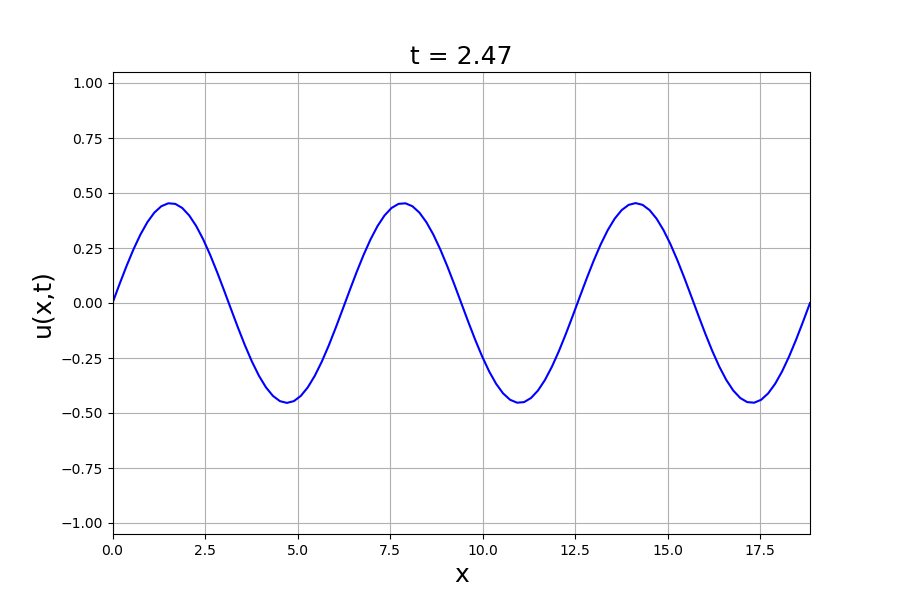

Wall time: 15.6 ms


In [25]:
%%time
%matplotlib notebook
fig = plt.figure(figsize = (9, 6))
        
anim = animation.FuncAnimation(fig, animate, frames=int(Tau), interval=1)
#anim.save(name_1, fps=60)

In [17]:
file = open(name_1)
html = file.read()
file.close()

display(HTML(html))

## Задание 2
В условии 1 задания взять 
### \begin{equation}
	\mu_3(x) = \sin \left( x \left( 1 + 0.1 e^{-(x-10)^2}\right) \right),
\end{equation}

подобрать согласованные граничные условия. Все остальное оставить как в 1 задании. Повторить расчет.


In [21]:
%%time
phi = lambda x: np.sin(x*(1 + 0.1*np.exp(-(x-10)**2)))
U = scheme_with_weight(x,t,mu1(t),mu2(t),phi(x),psi(x),c)

Wall time: 309 ms


In [9]:
name_2 = 'lab_12_task_2.htm'

C:\Users\Aleksandr\Anaconda3\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


Wall time: 3min 37s


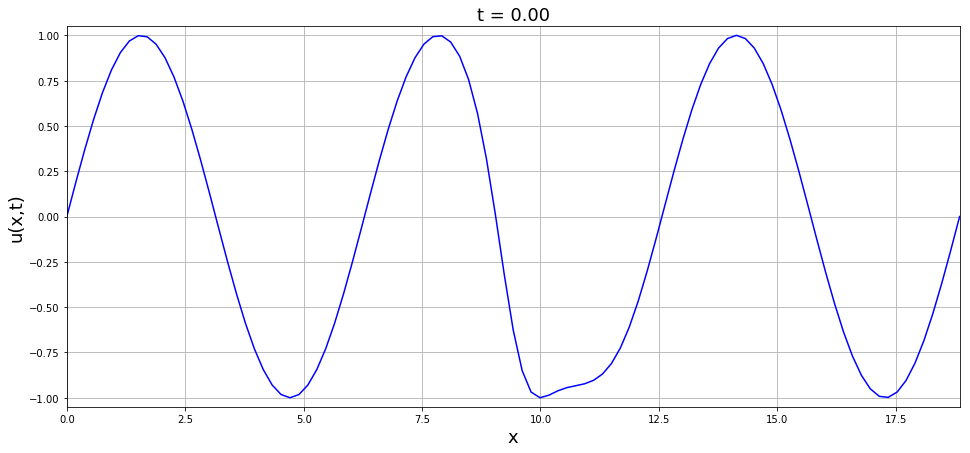

In [24]:
%%time
fig = plt.figure(figsize = (16, 7))
    
anim = animation.FuncAnimation(fig, animate, frames=int(Tau), interval=1, repeat=True)
anim.save(name_2, fps=60)

In [10]:
file = open(name_2)
html = file.read()
file.close()

display(HTML(html))


## Задание 3

В условии 2 задания провести расчет на сгущающихся сетках и доказать второй порядок метода. 

Задачу решать в области $[0; 6\pi] \times [0; 1]$, для первой сетки взять $\tau = 1/16$ и $h = 6\pi/16$. 

Провести расчеты на 7 сетках. Решение на каждом слое не отображать. 

Построить график эффективного порядка от номера самой грубой сетки из трех сеток, участвующих в расчете эффективного порядка.

In [33]:
%%time
%matplotlib inline
norm_c = lambda mat: np.max(np.abs(mat))

T = 1
start = 4
stop = start + 7

h =   [ 6*np.pi/2**n for n in range(start,stop)]
tau = [ 1/2**n for n in range(start,stop)]

U = []
phi = lambda x: np.sin(x*(1 + 0.1*np.exp(-(x-10)**2)))

for hh, ttau in zip(h,tau):
    N = round(X/hh + 1)
    Tau = round(T/ttau + 1)

    x = np.array([hh*xx for xx in range(N)])
    t = np.array([ttau*tt for tt in range(Tau)])
    
    U.append(scheme_with_weight(x,t,mu1(t),mu2(t),phi(x),psi(x),c))

Wall time: 42.9 s


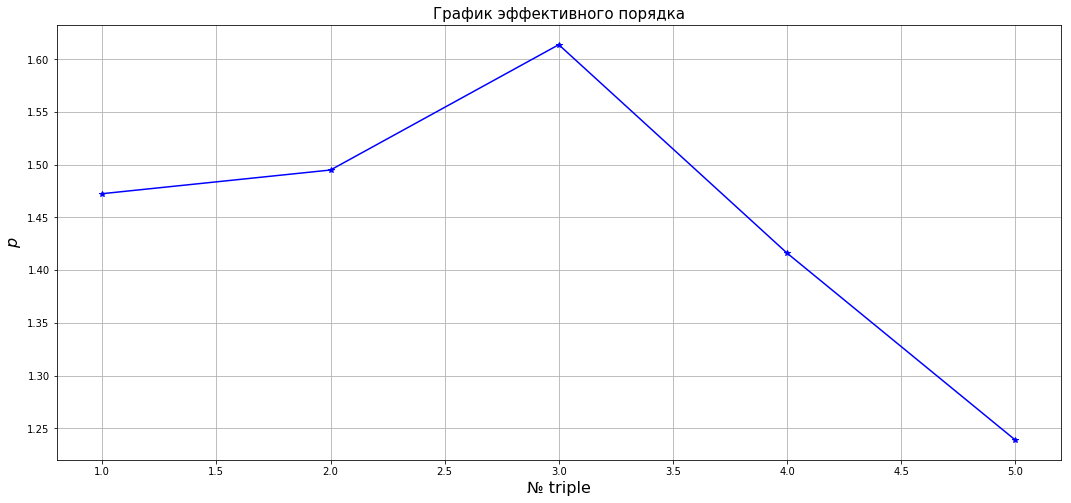

In [34]:
values_eff = effective_order_of_method(U, 2, draw_flag=True)    